# Querying the KServe SDXL runtime

### Inference endpoint address

In [2]:
# Enter below your inferencing endpoint address

inferencing_endpoint = 'http://127.0.0.1:8080/v1/models/model:predict'

### Imports

In [3]:
import requests
import base64
from io import BytesIO
from PIL import Image

### Using the base model only

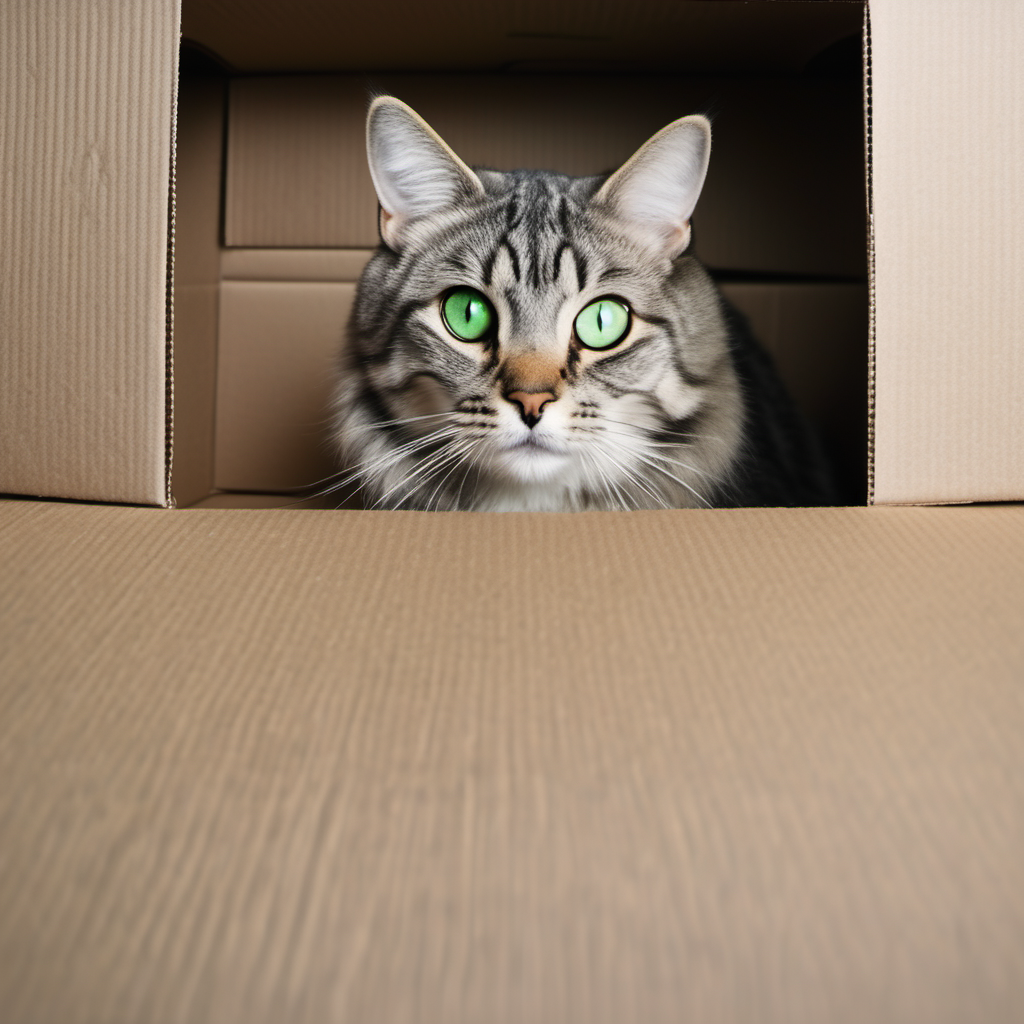

In [4]:
# Prepare the request data with your prompt
data = {
  "instances": [
    {
      "prompt": "grey tabby cat with green eyes hiding inside a cardboard box, photograph, nikon, detailed, 8k",
      "guidance_scale": 8.0,
      "num_inference_steps": 50,
      "crops_coords_top_left": [256, 0],
      "width": 1024,
      "height": 1024
    }
  ]
}

# Send a request to your server
response = requests.post(inferencing_endpoint, json=data)

# Get the Base64-encoded image string from the response
img_str = response.json()["predictions"][0]["image"]["b64"]

if img_str:
    # Decode the Base64 string to bytes
    img_bytes = base64.b64decode(img_str)

    # Convert bytes data to PIL Image
    img = Image.open(BytesIO(img_bytes))

img

### Using Base model and Refiner

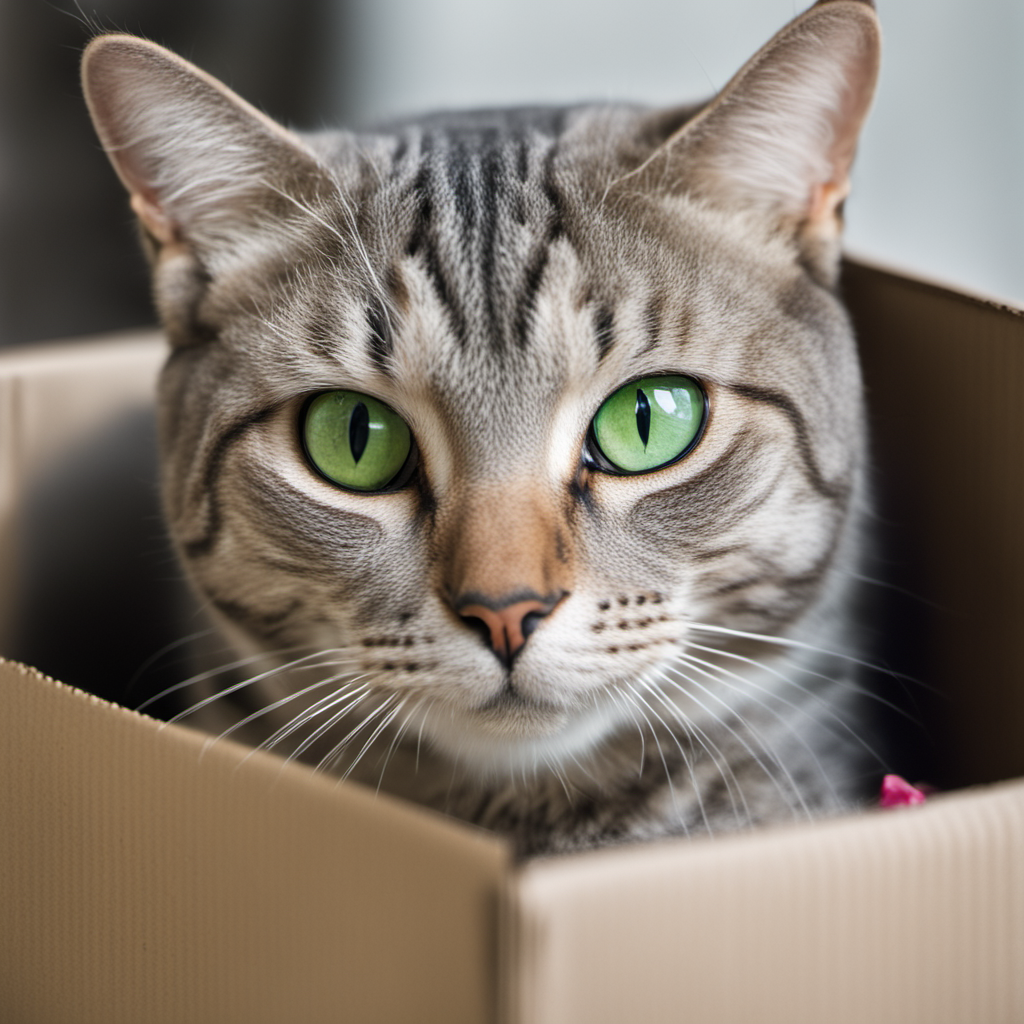

In [5]:
# Prepare the request data with your prompt
data = {
  "instances": [
    {
      "prompt": "grey tabby cat with green eyes hiding inside a cardboard box, photograph, nikon, detailed, 8k",
      "guidance_scale": 8.0,
      "num_inference_steps": 50,
      "crops_coords_top_left": [256, 0],
      "width": 1024,
      "height": 1024,
      "denoising_limit": 0.8
    }
  ]
}

# Send a request to your server
response = requests.post(inferencing_endpoint, json=data)

# Get the Base64-encoded image string from the response
img_str = response.json()["predictions"][0]["image"]["b64"]

if img_str:
    # Decode the Base64 string to bytes
    img_bytes = base64.b64decode(img_str)

    # Convert bytes data to PIL Image
    img = Image.open(BytesIO(img_bytes))

img